In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('./diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [60]:
df.shape

(768, 9)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [62]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

checking NaN values

In [63]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

vizualization

<Figure size 1500x1000 with 0 Axes>

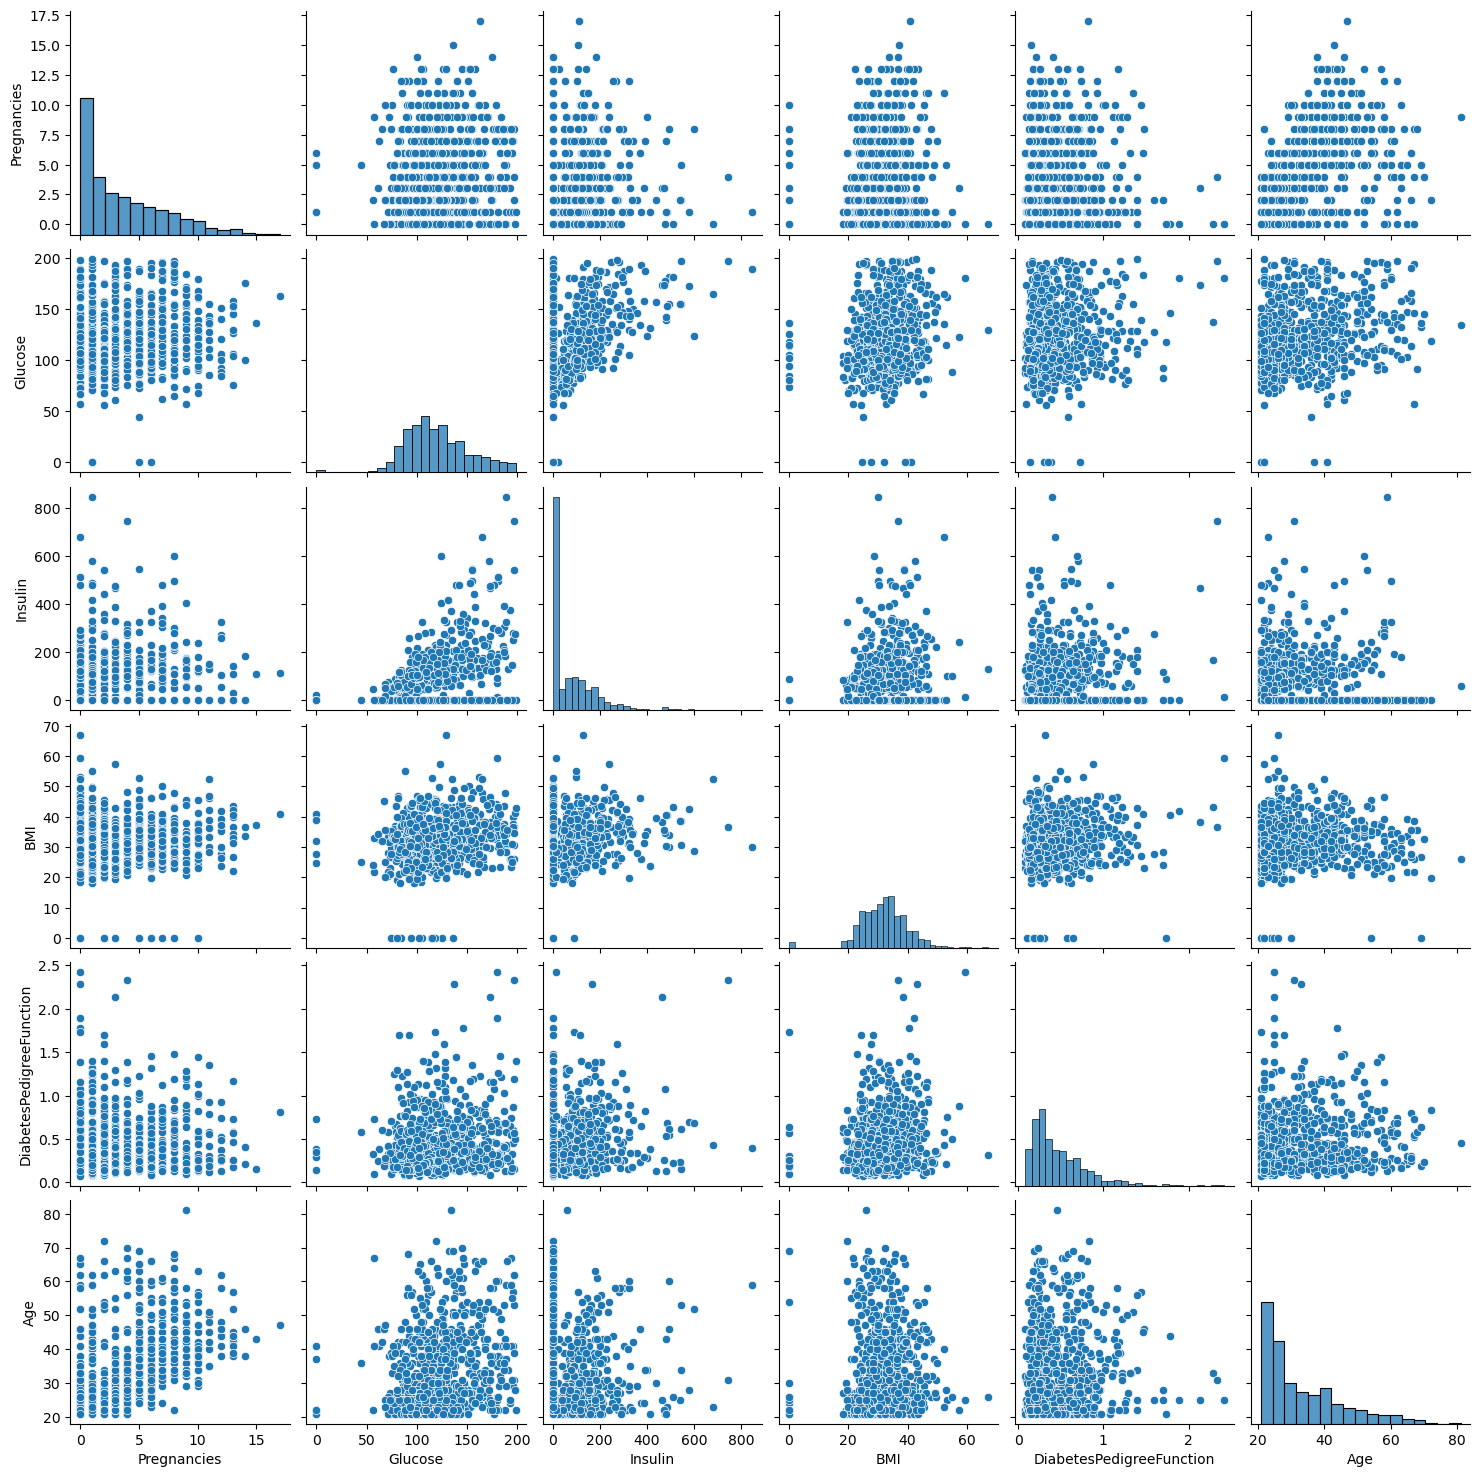

In [64]:
plt.figure(figsize=(15,10))
sns.pairplot(df.drop(['SkinThickness', 'BloodPressure', 'Outcome'], axis=1))
plt.show()

preparing to Machine Learning

In [65]:
X = df.drop(['SkinThickness', 'BloodPressure', 'Outcome'], axis=1)
y = df['Outcome']

In [66]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

normalize

In [67]:
from sklearn.preprocessing import StandardScaler

standart_scaler = StandardScaler()

X = standart_scaler.fit_transform(X)

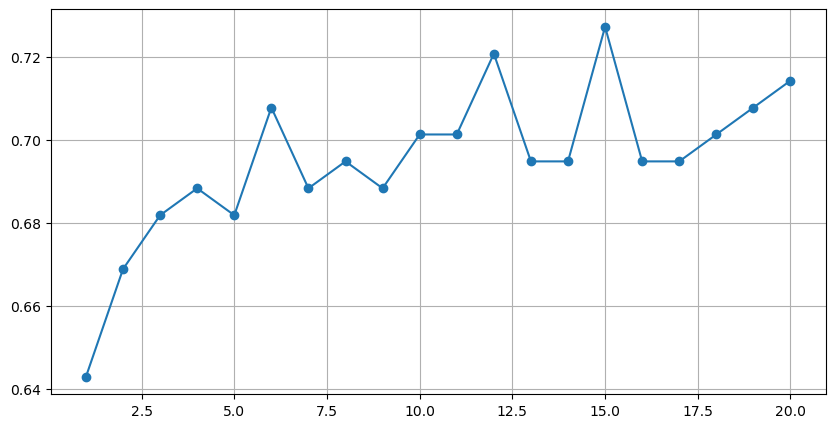

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# applying smote to balance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# finding best K 
scores = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_resampled, y_train_resampled)
    scores.append(knn.score(X_test, y_test))

plt.figure(figsize=(10, 5))      
plt.plot(range(1, 21), scores, marker='o')
plt.grid()
plt.show()

select the best K

In [135]:
best_k = range(1, 21)[np.argmax(scores)]  
print(f"Best K: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_resampled, y_train_resampled)

Best K: 15


KNeighborsClassifier(n_neighbors=15)

prediction

In [136]:
y_predict = knn.predict(X_test)

estimate model

In [137]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.5172413793103449

confusion matrix

[[67 32]
 [10 45]]


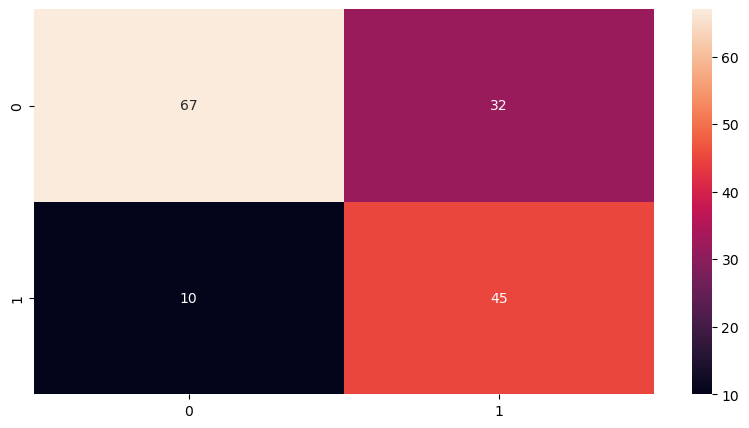

In [138]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test, y_predict)

print(con_matrix)

plt.figure(figsize=(10, 5))
sns.heatmap(con_matrix, annot=True)
plt.show()

In [139]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76        99
           1       0.58      0.82      0.68        55

    accuracy                           0.73       154
   macro avg       0.73      0.75      0.72       154
weighted avg       0.77      0.73      0.73       154



In [140]:
from sklearn.model_selection import cross_val_predict

predict = cross_val_predict( estimator=KNeighborsClassifier(n_neighbors=best_k), X=X, y=y, cv=5 )

print( classification_report(y, predict))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       500
           1       0.71      0.53      0.60       268

    accuracy                           0.76       768
   macro avg       0.74      0.71      0.72       768
weighted avg       0.75      0.76      0.75       768

